# Brief Introduction of Data Set and Data Modeling Problem

Our Goal: Based on the attributes’ of the data, we can generate some sort of credit rating and predict if the customer will default payment next month.


Attribute Information:
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:


# Explanation of Data

<b>Limit Balance:</b> <br>
Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. <br>

<b>Sex:</b> <br>
Gender of Credit Customer <br>
1 = male <br>
2 = female <br>

<b>Education:</b><br>
One of the 4 Levels of Education of Customer <br>
1 = graduate school <br>
2 = university<br>
3 = high school<br>
4 = others

<b>Marriage:</b><br>
Marital status <br>
1 = married<br>
2 = single<br>
3 = others<br>

<b>Age:</b><br>
Age - continuous variable (number of years)<br>

<b>PAY_0, PAY_2 - PAY_6:</b><br>
History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: <br>
X6 = the repayment status in September, 2005<br>
X7 = the repayment status in August, 2005<br>
X8 = the repayment status in July, 2005<br>
X9 = the repayment status in June, 2005<br>
X10 = the repayment status in May, 2005<br>
X11 = the repayment status in April, 2005<br>

The measurement scale for the repayment status is: <br>
1 = payment delay for one month<br>
2 = payment delay for two months<br>
3 = payment delay for three months<br>
4 = payment delay for four months<br>
5 = payment delay for five months<br>
6 = payment delay for six months<br>
7 = payment delay for seven months <br>
8 = payment delay for eight months<br>
9 = payment delay for nine months and above. <br>
-2 = Balance paid in full and no transactions this period (we may refer to this credit card account as having been 'inactive' this period)<br>
-1 = Balance paid in full, but account has a positive balance at end of period due to recent transactions for which payment has not yet come due<br>
0 = Customer paid the minimum due amount, but not the entire balance. I.e., the customer paid enough for their account to remain in good standing, but did revolve a balance* <br>


<b>BILL_AMT1 - BILL_AMT6:</b><br>
Amount of bill statement (NT dollar). <br>
X12 = amount of bill statement in September, 2005 <br>
X13 = amount of bill statement in August, 2005<br>
X14 = amount of bill statement in July, 2005<br>
X15 = amount of bill statement in June, 2005<br>
X16 = amount of bill statement in May, 2005<br>
X17 = amount of bill statement in April, 2005 <br>


<b>PAY_AMT1 - PAY_AMT6:</b><br>
Amount of previous payment (NT dollar)<br>
X18 = amount paid in September, 2005<br>
X19 = amount paid in August, 2005<br>
X20 = amount paid in July, 2005<br>
X21 = amount paid in June, 2005<br>
X22 = amount paid in May, 2005<br>
X23 = amount paid in April, 2005<br>


<b>Default Payment Next Month:</b><br>
Target Variable<br>

*(Source: http://inseaddataanalytics.github.io/INSEADAnalytics/CourseSessions/ClassificationProcessCreditCardDefault.html)


In [1]:
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')

C:\Users\valli\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
df = pd.read_csv('C:/Users/valli/Downloads/card.csv',  skiprows = 1)

In [138]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Exploratory Data Analysis

In [139]:
df.shape

(30000, 25)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

Data has only integer values, no variable columns has null or missing values.

In [141]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


For LIMIT_BAL and all the BILL_AMTs and PAY_AMTs, there is a significantly large difference between the 75% and the max value, therefore there are extreme outliers in our dataset.

In [142]:
df.SEX.unique()

array([2, 1])

In [143]:
df.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0])

In [144]:
df.MARRIAGE.unique()

array([1, 2, 3, 0])

In [145]:
df.PAY_0.unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

In [146]:
df.PAY_2.unique()

array([ 2,  0, -1, -2,  3,  5,  7,  4,  1,  6,  8])

In [147]:
df.PAY_3.unique()

array([-1,  0,  2, -2,  3,  4,  6,  7,  1,  5,  8])

In [148]:
df.PAY_4.unique()

array([-1,  0, -2,  2,  3,  4,  5,  7,  6,  1,  8])

In [149]:
df.PAY_5.unique()

array([-2,  0, -1,  2,  3,  5,  4,  7,  8,  6])

In [150]:
df.PAY_6.unique()

array([-2,  2,  0, -1,  3,  6,  4,  7,  8,  5])

For education, there are rows with 0, 5 and 6 which belong to unknown categories. For marriage, there are rows with 0 which belong to unknown cateogory. For PAY_0 to PAY_6, there are rows with -2 and 0 which belong to unknown categories.

In [151]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [152]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

# Data Pre-processing

For rows with education = 0, 5 or 6, we convert it into type 4, which categorises the unknown categories into "others".
For rows with marriage = 0, we convert it into type 3, which categorises the unknown category into "others". 

In [3]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [4]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [5]:
df.isnull().any().sum()

0

In [6]:
All = df.shape[0]
default = df[df['default payment next month'] == 1]
nonDefault = df[df['default payment next month'] == 0]
x = len(default)/All
y = len(nonDefault)/All
print('yes :',x*100,'%')
print('no :',y*100,'%')

yes : 22.12 %
no : 77.88000000000001 %


Text(0, 0.5, 'Frequency')

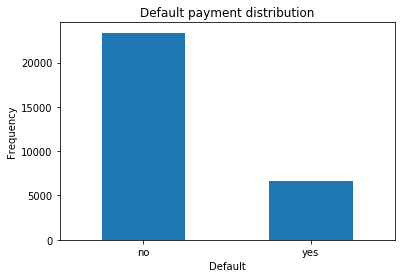

In [7]:
labels = ['no','yes']
classes = pd.value_counts(df['default payment next month'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Default payment distribution")
plt.xticks(range(2), labels)
plt.xlabel("Default")
plt.ylabel("Frequency")

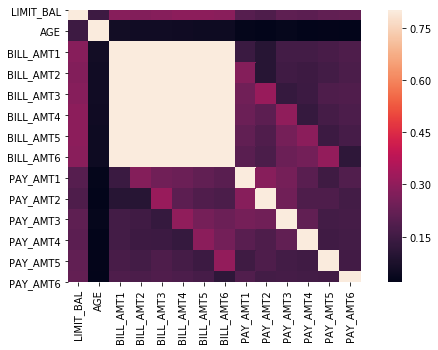

In [8]:
correlation_matrix = df.loc[:,["LIMIT_BAL", "AGE", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", 
                               "BILL_AMT5", "BILL_AMT6", "PAY_AMT1",  "PAY_AMT2",  "PAY_AMT3",  "PAY_AMT4", 
                               "PAY_AMT5",  "PAY_AMT6"]].corr()

fig = plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

To find if there are any dependencies between the attributes, we used a correlation matrix.
Attributes BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 are strongly positively correlated, meaning that if the customers spent a large amount in September, they are likely to spend a large amount in August, July, June, May, April. 
AGE is not linearly correlated to any BILL_AMTs and PAY_AMTs as the correlation coefficients are very close to 0. This implies that the age of the customers do not affect the amount they spent and the amount they pay each month.  

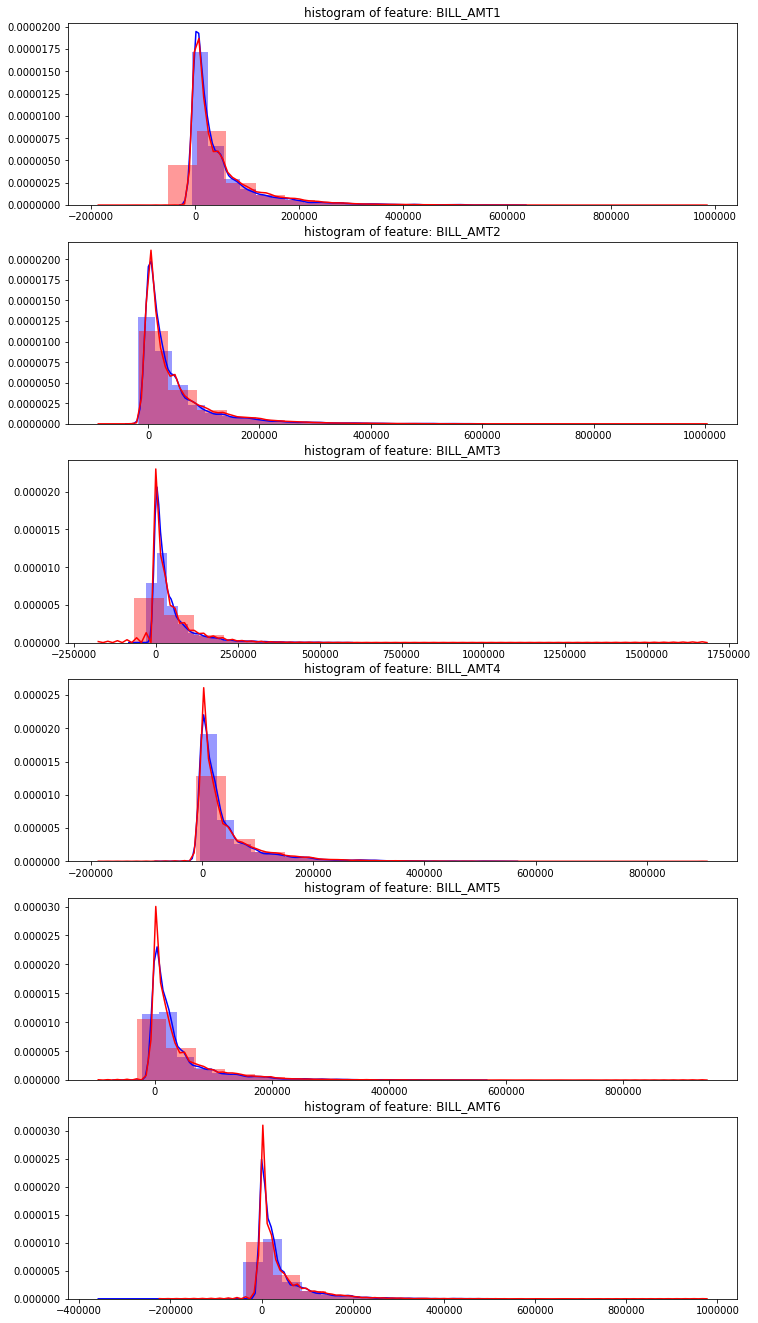

In [9]:
import matplotlib.gridspec as gridspec

anomalous_features = df.iloc[:,12:18].columns

plt.figure(figsize=(12,28*4))

gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[anomalous_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df['default payment next month'] == 1], bins=20, color = 'blue')
    sns.distplot(df[cn][df['default payment next month'] == 0], bins=20, color = 'red')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

The histograms plotted show the distribution of BILL_AMT attributes. All the histograms are positively skewed.

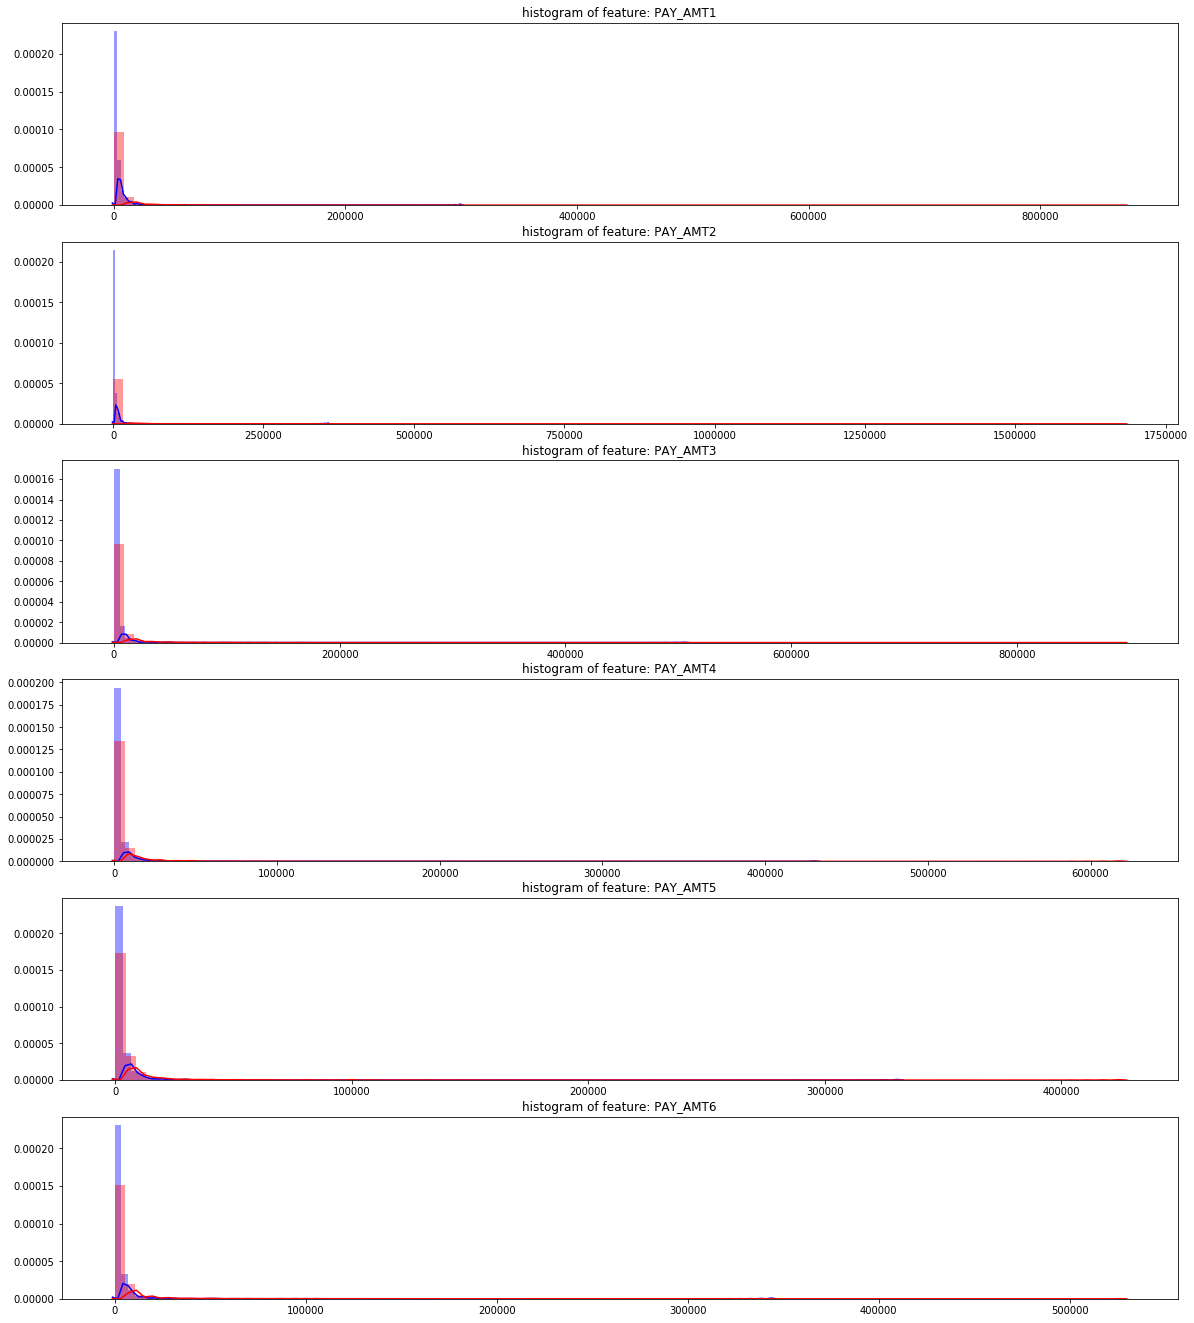

In [10]:
anomalous_features2 = df.iloc[:,18:24].columns

plt.figure(figsize=(20,28*4))

gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[anomalous_features2]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df['default payment next month'] == 1], bins=100, color = 'blue')
    sns.distplot(df[cn][df['default payment next month'] == 0], bins=100, color = 'red') 
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

We removed the rows with PAY_AMT values higher than the 75th percentile, therefore we have a clearer view of the region where most data points are concentrated.

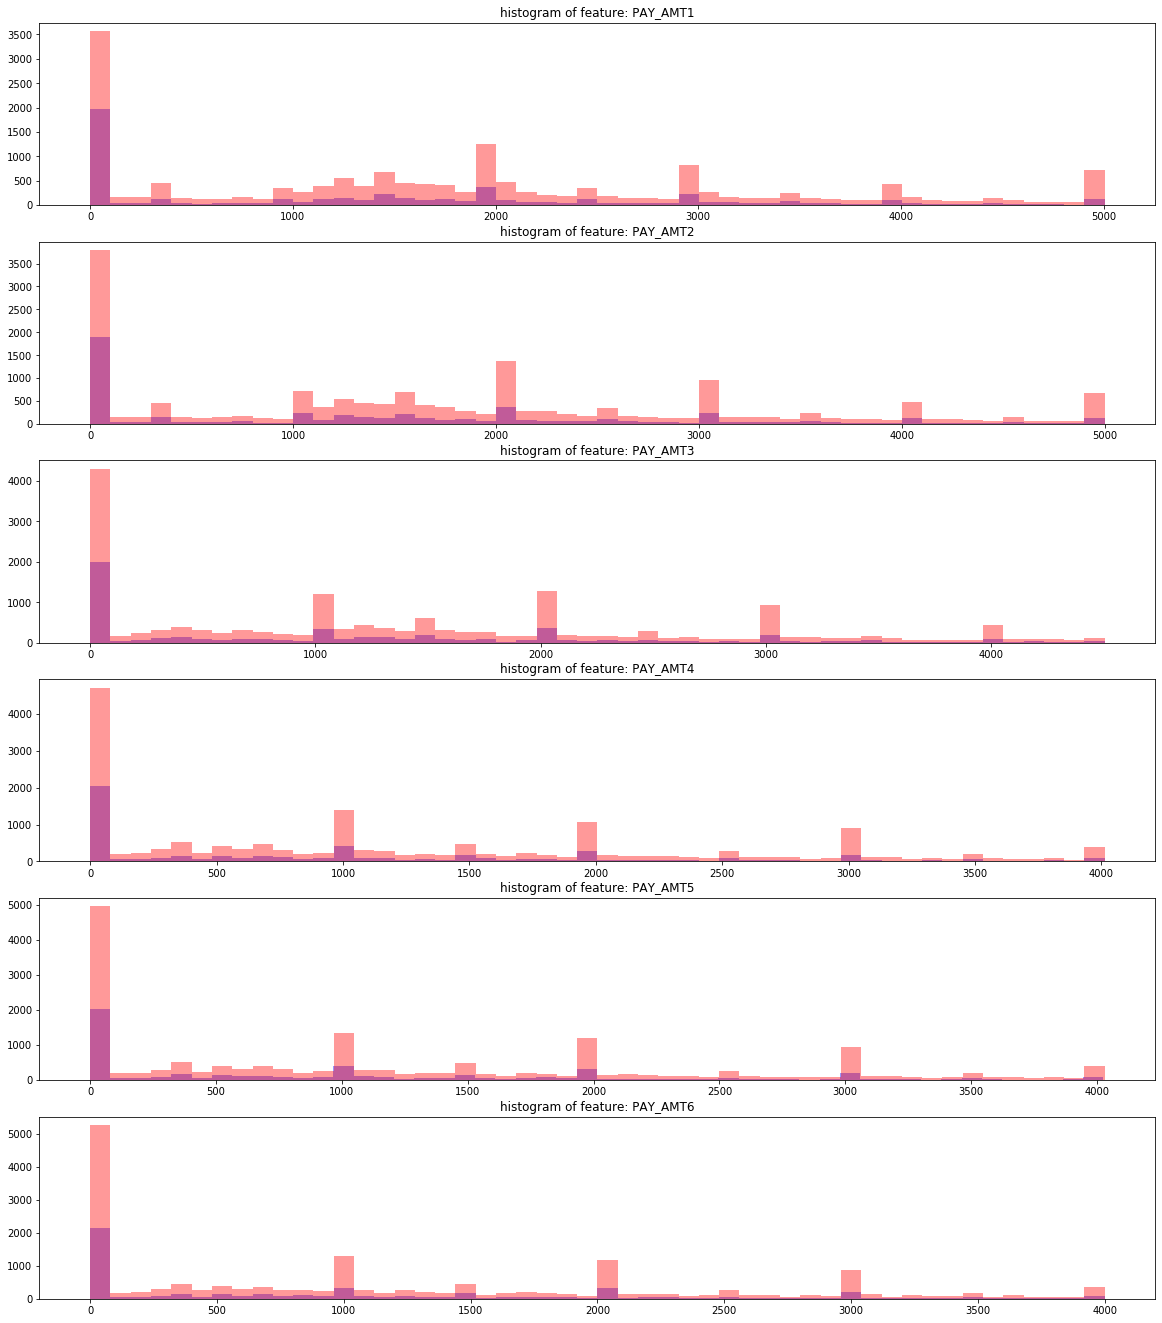

In [11]:
amt = [5006,5.000000e+03,4505,4013.250000,4031.500000,4000.000000]
anomalous_features2 = df.iloc[:,18:24].columns

plt.figure(figsize=(20,28*4))

gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[anomalous_features2]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df[cn] <= amt[i]][df['default payment next month'] == 1], bins=50, kde = False, color = 'blue')
    sns.distplot(df[cn][df[cn] <= amt[i]][df['default payment next month'] == 0], bins=50, kde = False, color = 'red')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

We can see that there are many more data points concentrated near 0. The number of data points that have default payment next month = 0 is consistently higher than the that of default payment next month = 1.

## Feature Selection

In [12]:
X = df.iloc[:,1:24]
y = df.iloc[:,-1]
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.333, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score)) 

Optimum number of features: 12
Score with 12 features: 0.126327


In [14]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1'],
      dtype='object')


# Model Selection
<font color = "blue"><p style = "font-size:20px">One Hot Encoding for Featured Categorical Attributes</p></font>

In [15]:
featured_df = df.loc[:, ["SEX","EDUCATION", "MARRIAGE", "AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "BILL_AMT1", "PAY_AMT1", "default payment next month"]]

In [16]:
featured_df

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,default payment next month
0,2,2,1,24,2,2,-1,-1,-2,-2,3913,0,1
1,2,2,2,26,-1,2,0,0,0,2,2682,0,1
2,2,2,2,34,0,0,0,0,0,0,29239,1518,0
3,2,2,1,37,0,0,0,0,0,0,46990,2000,0
4,1,2,1,57,-1,0,-1,0,0,0,8617,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,3,1,39,0,0,0,0,0,0,188948,8500,0
29996,1,3,2,43,-1,-1,-1,-1,0,0,1683,1837,0
29997,1,2,2,37,4,3,2,-1,0,0,3565,0,1
29998,1,3,1,41,1,-1,0,0,0,-1,-1645,85900,1


In [17]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(dtype = np.int, sparse = True)
nominals = pd.DataFrame(onehot.fit_transform(featured_df[['SEX', 'EDUCATION', 'MARRIAGE']]).toarray(),
                                columns = ['F','M', 'EDU_GRAD', 'EDU_UNI', 'EDU_HIGH', 'EDU_OTHERS', 'MARRIAGE_MARRIED', 'MARRIAGE_SINGLE', 'MARRIAGE_OTHERS'
                                         ])
nominals

,F,M,EDU_GRAD,EDU_UNI,EDU_HIGH,EDU_OTHERS,MARRIAGE_MARRIED,MARRIAGE_SINGLE,MARRIAGE_OTHERS
0,0,1,0,1,0,0,1,0,0
1,0,1,0,1,0,0,0,1,0
2,0,1,0,1,0,0,0,1,0
3,0,1,0,1,0,0,1,0,0
4,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,1,0,1,0,0
29996,1,0,0,0,1,0,0,1,0
29997,1,0,0,1,0,0,0,1,0
29998,1,0,0,0,1,0,1,0,0


In [18]:
pay_df = featured_df.iloc[:,4:10]
pay_col = pay_df.columns
for i in range(len(pay_col)):
    pay_df[pay_col[i]] = pay_df[pay_col[i]].apply(lambda x : x+2)

nominals_pay0 = pd.DataFrame(onehot.fit_transform(pay_df[['PAY_0']]).toarray(),
                                columns = ['PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5',
                                          'PAY_0_6', 'PAY_0_7','PAY_0_8', 'PAY_0_9', 'PAY_0_10'])
nominals_pay2 = pd.DataFrame(onehot.fit_transform(pay_df[['PAY_2']]).toarray(),
                                columns = ['PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5',
                                          'PAY_2_6', 'PAY_2_7','PAY_2_8', 'PAY_2_9', 'PAY_2_10'])
nominals_pay3 = pd.DataFrame(onehot.fit_transform(pay_df[['PAY_3']]).toarray(),
                                columns = ['PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5',
                                          'PAY_3_6', 'PAY_3_7','PAY_3_8', 'PAY_3_9', 'PAY_3_10'])
nominals_pay4 = pd.DataFrame(onehot.fit_transform(pay_df[['PAY_4']]).toarray(),
                                columns = ['PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5',
                                          'PAY_4_6', 'PAY_4_7','PAY_4_8', 'PAY_4_9', 'PAY_4_10'])
nominals_pay5 = pd.DataFrame(onehot.fit_transform(pay_df[['PAY_5']]).toarray(),
                                columns = ['PAY_5_0', 'PAY_5_1', 'PAY_5_2', 'PAY_5_4', 'PAY_5_5',
                                          'PAY_5_6', 'PAY_5_7','PAY_5_8', 'PAY_5_9', 'PAY_5_10'])
nominals_pay6 = pd.DataFrame(onehot.fit_transform(pay_df[['PAY_6']]).toarray(),
                                columns = ['PAY_6_0', 'PAY_6_1', 'PAY_6_2', 'PAY_6_4', 'PAY_6_5',
                                          'PAY_6_6', 'PAY_6_7','PAY_6_8', 'PAY_6_9', 'PAY_6_10'])
nominals = pd.concat([nominals, nominals_pay0, nominals_pay2, nominals_pay3, nominals_pay4, nominals_pay5, nominals_pay6], axis = 1)

nominals_cont = featured_df.loc[:, ['AGE', 'BILL_AMT1', 'PAY_AMT1', 'default payment next month']]
nominals = pd.concat([nominals, nominals_cont], axis = 1)
nominals

,F,M,EDU_GRAD,EDU_UNI,EDU_HIGH,EDU_OTHERS,MARRIAGE_MARRIED,MARRIAGE_SINGLE,MARRIAGE_OTHERS,PAY_0_0,...,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_6_9,PAY_6_10,AGE,BILL_AMT1,PAY_AMT1,default payment next month
0,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,24,3913,0,1
1,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,26,2682,0,1
2,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,34,29239,1518,0
3,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,37,46990,2000,0
4,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,57,8617,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,39,188948,8500,0
29996,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,43,1683,1837,0
29997,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,37,3565,0,1
29998,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,41,-1645,85900,1


<font color = "blue"><p style = "font-size:20px">SVM</p></font>

In [19]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
X_featured = nominals.iloc[:,0:76]
y_featured = nominals.iloc[:,-1]

X_train_featured,X_test_featured,y_train_featured,y_test_featured = train_test_split(X_featured,y_featured, test_size = 0.333, random_state = 1)

In [20]:
X_featured

,F,M,EDU_GRAD,EDU_UNI,EDU_HIGH,EDU_OTHERS,MARRIAGE_MARRIED,MARRIAGE_SINGLE,MARRIAGE_OTHERS,PAY_0_0,...,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_6_9,PAY_6_10,AGE,BILL_AMT1,PAY_AMT1
0,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,24,3913,0
1,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,26,2682,0
2,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,34,29239,1518
3,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,37,46990,2000
4,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,57,8617,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,39,188948,8500
29996,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,43,1683,1837
29997,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,37,3565,0
29998,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,41,-1645,85900


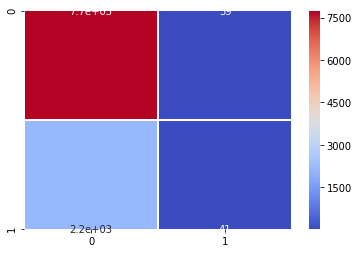

In [23]:
from sklearn import svm
scv_featured = svm.SVC(kernel = 'rbf', random_state = 0, gamma = 'auto')
scv_featured.fit(X_train_featured, y_train_featured)
y_pred_featured = scv_featured.predict(X_test_featured)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_featured, y_pred_featured)
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')

In [190]:
cm

array([[7717,   39],
       [2193,   41]])

In [191]:
from sklearn.metrics import roc_auc_score
values = precision_recall_fscore_support(y_test_featured, y_pred_featured,average='weighted',warn_for=tuple())
roc=roc_auc_score(y_test_featured, y_pred_featured)
acc = accuracy_score(y_test_featured, y_pred_featured)
precision = values[0]
recall = values[1]
f1score = values[2]

In [192]:
model_results = pd.DataFrame([['SVM Tuned', acc, precision, recall, f1score, roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,SVM Tuned,0.776577,0.719178,0.776577,0.68621,0.506662


The OneHotEncoder previously assumed that the input features take on values in the range [0, max(values)).
This encoding is needed for feeding categorical data to many scikit-learn estimators, notably linear models and SVMs with the standard kernels.

We based our research on this documentation which states that One Hot Encoding is preferable for SVM:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [193]:
X = df.iloc[:,1:24]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.333, random_state = 0)


from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

y_pred = naive_bayes.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results_nb = pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(results_nb, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,SVM Tuned,0.776577,0.719178,0.776577,0.686210,0.506662
1,Gaussian Naive Bayes,0.351051,0.237483,0.910316,0.376695,0.553908


In [135]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train_featured,y_train_featured)

y_pred = naive_bayes.predict(X_test_featured)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_featured, y_pred)
cm
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test_featured, y_pred)
acc = accuracy_score(y_test_featured, y_pred)
prec = precision_score(y_test_featured, y_pred)
rec = recall_score(y_test_featured, y_pred)
f1 = f1_score(y_test_featured, y_pred)

results_nbtuned = pd.DataFrame([['Gaussian Naive Bayes Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(results_nbtuned, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,SVM Tuned,0.776076,0.719178,0.776577,0.686210,0.502037
1,Gaussian Naive Bayes,0.351051,0.237483,0.910316,0.376695,0.553908
2,Gaussian Naive Bayes Tuned,0.776076,0.451613,0.006267,0.012362,0.502037
3,Random Forest Classifier,0.812913,0.794063,0.812913,0.791575,0.650849
4,Logistic Regression,0.776376,0.615573,0.784585,0.689878,0.500000
5,Logistic Regression,0.784585,0.615573,0.784585,0.689878,0.500000
6,Gaussian Naive Bayes Tuned,0.776076,0.451613,0.006267,0.012362,0.502037


<font color = "blue"><p style = "font-size:20px">Logistic Regression</p></font>

In [134]:
from sklearn.linear_model import LogisticRegression

X = df.iloc[:,1:24].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.333, random_state = 0)

logmodel = LogisticRegression(random_state=1, solver = 'liblinear')
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from sklearn.metrics import precision_recall_fscore_support
values = precision_recall_fscore_support(y_test, y_pred,average='weighted',warn_for=tuple())
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
precision = values[0]
recall = values[1]
f1score = values[2]

results_lr = pd.DataFrame([['Logistic Regression', acc,precision,recall, f1score,roc]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(results_lr, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,SVM Tuned,0.776076,0.719178,0.776577,0.686210,0.502037
1,Gaussian Naive Bayes,0.351051,0.237483,0.910316,0.376695,0.553908
2,Gaussian Naive Bayes Tuned,0.776076,0.451613,0.006267,0.012362,0.502037
3,Random Forest Classifier,0.812913,0.794063,0.812913,0.791575,0.650849
4,Logistic Regression,0.776376,0.615573,0.784585,0.689878,0.500000
5,Logistic Regression,0.784585,0.615573,0.784585,0.689878,0.500000


In [102]:
from sklearn.linear_model import LogisticRegression

sel_ = SelectFromModel(LogisticRegression(solver = 'liblinear'))
sel_.fit(X_train, y_train)
sel_.get_support()
X_train_selected = sel_.transform(X_train)
X_test_selected = sel_.transform(X_test)

logmodel = LogisticRegression(random_state=1, solver = 'liblinear')
logmodel.fit(X_train_selected,y_train)
y_pred_selected = logmodel.predict(X_test_selected)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_selected)
cm

from sklearn.metrics import precision_recall_fscore_support
values = precision_recall_fscore_support(y_test, y_pred_selected,average='weighted',warn_for=tuple())
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred_selected)
acc = accuracy_score(y_test, y_pred_selected)
precision = values[0]
recall = values[1]
f1score = values[2]

results_lrtuned = pd.DataFrame([['Logistic Regression Tuned', acc,precision,recall, f1score,roc]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(results_lrtuned, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,SVM Original,0.773473,0.663331,0.773473,0.680329,0.500839
1,SVM Tuned,0.776577,0.719178,0.776577,0.686210,0.506662
2,Logistic Regression,0.776376,0.602760,0.776376,0.678640,0.500000
3,Logistic Regression Tuned,0.804905,0.790130,0.804905,0.760602,0.593266


<font color = "blue"><p style = "font-size:20px">Random Forest</p></font>

In [132]:
from sklearn.ensemble import RandomForestClassifier

X = df.iloc[:,1:24].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.333, random_state = 0)

rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from sklearn.metrics import precision_recall_fscore_support
values = precision_recall_fscore_support(y_test, y_pred,average='weighted',warn_for=tuple())
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test_original, y_pred)
acc = accuracy_score(y_test_original, y_pred)
precision = values[0]
recall = values[1]
f1score = values[2]

results_rf = pd.DataFrame([['Random Forest Classifier', acc,precision,recall, f1score,roc]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(results_rf, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,SVM Tuned,0.776076,0.719178,0.776577,0.686210,0.502037
1,Gaussian Naive Bayes,0.351051,0.237483,0.910316,0.376695,0.553908
2,Gaussian Naive Bayes Tuned,0.776076,0.451613,0.006267,0.012362,0.502037
3,Random Forest Classifier,0.812913,0.794063,0.812913,0.791575,0.650849


In [104]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support()
print(sel.get_support().sum())
print(X_train.columns[(sel.get_support())])
rfc_important = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)

X_important_train = sel.transform(X_train)
X_important_test = sel.transform(X_test)

rfc_important.fit(X_important_train, y_train)

y_important_pred = rfc_important.predict(X_important_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_important_pred)
cm

from sklearn.metrics import precision_recall_fscore_support
values = precision_recall_fscore_support(y_test, y_important_pred,average='weighted',warn_for=tuple())
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_important_pred)
acc = accuracy_score(y_test, y_important_pred)
precision = values[0]
recall = values[1]
f1score = values[2]

results_rftuned = pd.DataFrame([['Random Forest Classifier Tuned', acc,precision,recall, f1score,roc]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(results_rftuned, ignore_index = True)
model_results

15
Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,SVM Original,0.773473,0.663331,0.773473,0.680329,0.500839
1,SVM Tuned,0.776577,0.719178,0.776577,0.686210,0.506662
2,Logistic Regression,0.776376,0.602760,0.776376,0.678640,0.500000
3,Logistic Regression Tuned,0.804905,0.790130,0.804905,0.760602,0.593266
4,Random Forest Classifier,0.812913,0.794063,0.812913,0.791575,0.650849
5,Random Forest Classifier Tuned,0.814815,0.796608,0.814815,0.793196,0.652233


# Model Evaluation

To evaluate the performance of the models, we decided to use Accuracy and F1 score since in this business problem about credit default, identifying false positives and false negatives is important. This is to ensure we do not incorrectly identify a customer as having a default payment in the following month when they are not supposed to or incorrectly predict that they do not have default payment next month when they are supposed to. Both these scenarios could lead to losses acquired by both the customers and the company itself. Accuracy is a ratio of correctly predicted observation to the total observations, while F1 score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account and would be a good measure of the model.

The accuracy generated using the Random Forest model is the highest, followed by Logistic Regression and SVM. 

This is consistent with the F1 score and ROC as well. Hence, we can conclude that Random Forest is the best suited model for this business problem as it results in the largest accuracy and F1 score among all the models.

We see that there is an improvement in the accuracy of the models when only the important features are selected, so it is possible that with fewer attributes, it makes the model more generalisable and thus has higher accuracy.


# Discussion for Improvement

<b>1) Chi-square test could have used for feature selection:</b><br />
We can conduct feature selection by using Chi-Square for categorical variables and correlation matrix for continuous variables. From these features, we can conduct another round of model selection and see if the the features selected varies and would produce a better result.

<b>2) More models for model selection could have incorporated  -  kNN Models, Stochastic Gradient, Decision trees:</b><br />
This would have given us a wider variety of models to choose from for the purpose of simplifying and evaluating this business problem. This could have allowed us to choose a better model with higher performance level.

<b>3) KS statistic could have been used to evaluate the models:</b><br />
We decided to use ROC, F1 score and Accuracy due to simplicity and effectiveness. Moreover, ROC can clearly illustrate the diagnostic ability of a binary classifier system. However, KS statistic could have served as a good measure for evaluation as well to show how well the model discriminates between the two classes. 

<b>4) Penalties for each wrongly classified data could have been introduced using a cost/slack variable for SVM :</b><br />
The cost parameter for SVM would be useful in the case that incorrect predictions into one target class have more serious consequences than incorrect predictions into the other class, as in our case with the credit defaults. Therefore, the two types of incorrect predictions (incorrectly classifying as having a default payment in the following month and incorrectly classifying not having a default payment in the following month) should be weighted differently. 
In this prediction model, the cost of  false negative and a false positive is the same. However, in reality a false negative (wrongly predicting as not default but actually default) has a greater cost than a false positive (wrongly predicting as default but actually not default) and hence the cost parameter given to the false negative prediction will be higher.
